# Train/Loss

In [1]:
import json
import matplotlib.pyplot as plt

# model_dir = os.getenv('MODEL_DIR')
model_dir = "wav2vec2-large-xlsr-japlmthufiel-ipajaplmthufielta-nq-ns"
state_file = f"{model_dir}/trainer_state.json"

In [2]:
def load_training_state(state_file):
    with open(state_file, "r") as f:
        state = json.load(f)
    return state

training_state = load_training_state(state_file)

steps = []
train_loss = []
learning_rate = []

last_step = None

for entry in training_state["log_history"]:
    step = entry.get("step")
    
    if step != last_step:
        steps.append(step)
        
        train_loss.append(entry.get("loss", None))
        learning_rate.append(entry.get("learning_rate", None))

        last_step = step

print(f"Steps: {steps}, {len(steps)}")
print(f"Train Loss: {train_loss}, {len(train_loss)}")
print(f"Learning Rate: {learning_rate}, {len(learning_rate)}")


Steps: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 13
Train Loss: [40.4544, 43.1669, 42.4466, 42.2162, 38.7766, 40.325, 39.3221, 33.1761, 29.15, 24.4375, 20.1991, 16.0901, 12.2228], 13
Learning Rate: [5.999999999999999e-06, 1.1999999999999999e-05, 1.7999999999999997e-05, 2.3999999999999997e-05, 2.9999999999999997e-05, 3.5999999999999994e-05, 4.2e-05, 4.7999999999999994e-05, 5.399999999999999e-05, 5.9999999999999995e-05, 6.599999999999999e-05, 7.199999999999999e-05, 7.8e-05], 13


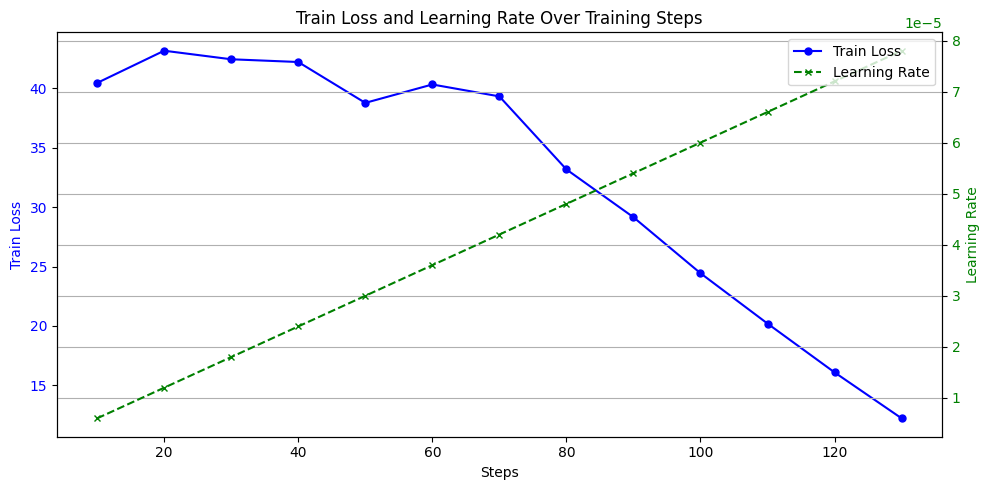

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotando a curva de Train Loss
ax1.set_xlabel("Steps")
ax1.set_ylabel("Train Loss", color='blue')
ax1.plot(steps, train_loss, label="Train Loss", marker="o", color='blue', linestyle='-', markersize=5)
ax1.tick_params(axis='y', labelcolor='blue')

# Criando o segundo eixo y para Learning Rate
ax2 = ax1.twinx()
ax2.set_ylabel("Learning Rate", color='green')
ax2.plot(steps, learning_rate, label="Learning Rate", marker="x", color='green', linestyle='--', markersize=5)
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title("Train Loss and Learning Rate Over Training Steps")
fig.tight_layout()  
plt.grid(True)

# Legenda para o gráfico
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Exibindo o gráfico
plt.show()